### Using a TRILEGAL file for a given healpix, 
### produce maps with Mr - [Fe/H] priors 

Version with a subsample of the hipscat TRILEGAL catalog processed with LSDB

In [16]:
try:
    client.shutdown()
    client.close()

except Exception as e:
    print(e)
    pass

In [17]:
%matplotlib inline
import sys
import lsdb
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

from dask.distributed import Client

client = Client(n_workers=70, threads_per_worker=1, memory_limit="20GiB")
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 70
Total threads: 70,Total memory: 1.37 TiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43847,Workers: 70
Dashboard: http://127.0.0.1:8787/status,Total threads: 70
Started: Just now,Total memory: 1.37 TiB
Comm: tcp://127.0.0.1:34045,Total threads: 1
Dashboard: http://127.0.0.1:38945/status,Memory: 20.00 GiB
Nanny: tcp://127.0.0.1:41825,


2024-12-12 21:07:10,945 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:42297 (pid=2604192) exceeded 95% memory budget. Restarting...
2024-12-12 21:07:12,328 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:42297' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('read_pixel-fused-nestedframe-35a544bf834d1cf3b7ccb905f8b3fbd6', 489), ('read_pixel-fused-nestedframe-35a544bf834d1cf3b7ccb905f8b3fbd6', 562), ('read_pixel-fused-nestedframe-35a544bf834d1cf3b7ccb905f8b3fbd6', 5785), ('read_pixel-fused-nestedframe-35a544bf834d1cf3b7ccb905f8b3fbd6', 6996), ('read_pixel-fused-nestedframe-35a544bf834d1cf3b7ccb905f8b3fbd6', 516), ('read_pixel-fused-nestedframe-35a544bf834d1cf3b7ccb905f8b3fbd6', 4473), ('read_pixel-fused-nestedframe-35a544bf834d1cf3b7ccb905f8b3fbd6', 6761), ('read_pixel-fused-nestedframe-35a544bf834d1cf3b7ccb905f8b3fbd6', 418), ('read_pixel-fused-nestedframe-35a544bf834d1cf3b7ccb905f8b3fbd6', 4948), ('read_pi

In [18]:
import os
import shutil
from collections import defaultdict

def delete_files_and_directories(directory):
    # Dictionary to store the count of each file extension
    extension_counts = defaultdict(int)
    file_count = 0
    dir_count = 0
    
    # Walk through the directory
    for root, dirs, files in os.walk(directory, topdown=False):
        # Delete files and collect their extensions
        for file in files:
            file_path = os.path.join(root, file)
            file_extension = os.path.splitext(file)[1]  # Get file extension
            extension_counts[file_extension] += 1
            os.remove(file_path)
            file_count += 1
        
        # Delete directories
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            shutil.rmtree(dir_path)
            dir_count += 1
    
    # Print the results
    print(f'Total files deleted: {file_count}')
    print(f'Total directories deleted: {dir_count}')
    print('File extensions and their counts:')
    for ext, count in extension_counts.items():
        print(f'{ext}: {count}')
    
    return file_count, dir_count, dict(extension_counts)

## LSDB

In [19]:
from lsdb.core.search import BoxSearch, ConeSearch, PolygonSearch

%time trilegal = lsdb.read_hats("/mnt/beegfs/scratch/data/TRILEGAL/TRILEGAL_hats/TRILEGAL_level_5_cluster/") #, search_filter=BoxSearch(ra=(-53, 61), dec=(-2., 2.)))

# search_filter=BoxSearch(ra=(-52, 60), dec=(-1.266, 1.266)))

# trilegal.skymap(lambda df, a: np.log10(len(df)+1), order=9)
# trilegal.plot_pixels()

CPU times: user 658 ms, sys: 80.8 ms, total: 739 ms
Wall time: 720 ms


In [20]:
trilegal.hc_structure.catalog_info.total_rows ## Make an Issue!!!

11433322690

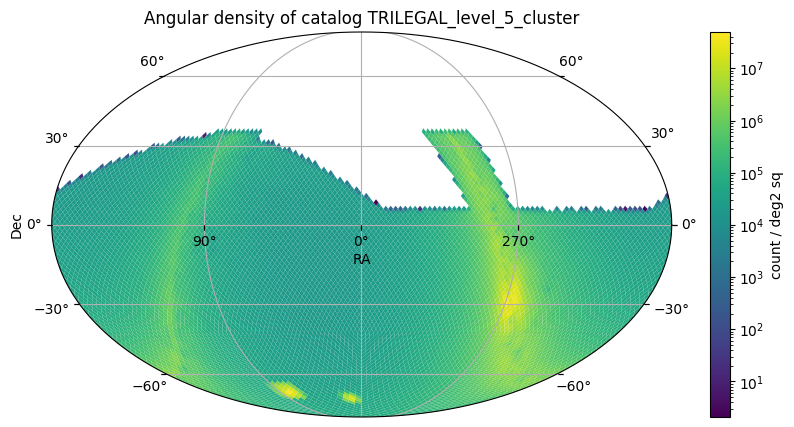

In [21]:
import hats
from hats.inspection import plot_density

catalog = hats.read_hats(("/mnt/beegfs/scratch/data/TRILEGAL/TRILEGAL_hats/TRILEGAL_level_5_cluster/"))
_ = plot_density(catalog, norm='log')

In [22]:
trilegal.hc_structure.catalog_info

TableProperties(catalog_name='TRILEGAL_level_5_cluster', catalog_type='object', total_rows=11433322690, ra_column='ra', dec_column='dec', default_columns=None, primary_catalog=None, margin_threshold=None, primary_column=None, primary_column_association=None, join_catalog=None, join_column=None, join_column_association=None, contains_leaf_files=None, indexing_column=None, extra_columns=None, hats_cols_sort='ra', hats_max_rows='1000000', hats_order='5', moc_sky_fraction='0.66260', hats_builder='hats-import v0.4.0', hats_creation_date='2024-10-21T23:17UTC', hats_estsize='951358532', hats_release_date='2024-09-18', hats_version='v0.1')

In [23]:
trilegal.head(3)

,ra,dec,glon,glat,m_ini,logage,FeH,DM,Av,mratio,mass,logl,logte,logg,umag,gmag,rmag,imag,zmag,ymag,ring256,comp,label,Ar,Mr,ug,gr,ri,iz,gi,Norder,Dir,Npix
_healpix_29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2791322981,44.996314,0.004604,176.952357,-48.902105,0.55141,10.07,-1.44,19.75,0.307,0.0,0.551,-0.852,3.6926,4.754,29.364,27.761,27.004,26.68,26.513,26.423,391808,3,1,0.272339,6.981661,1.491342,0.648064,0.258366,0.113077,0.90643,5,0,0
10770166929,44.992095,0.007781,176.944424,-48.902939,0.68601,10.11,-1.76,18.299999,0.367,0.0,0.686,-0.196,3.7779,4.534,25.27,24.336,23.900999,23.722,23.639999,23.608,391808,3,1,0.325565,5.275434,0.800519,0.304776,0.100538,0.017539,0.405313,5,0,0
15129849055,44.998278,0.012943,176.945294,-48.894905,0.35385,10.07,-2.08,16.35,0.386,0.0,0.354,-1.458,3.6479,4.988,28.110001,26.194,25.233999,24.799999,24.57,24.445999,391808,3,1,0.342419,8.54158,1.775608,0.823033,0.351477,0.162201,1.17451,5,0,0


In [24]:
import os
import shutil
from collections import defaultdict

def delete_files_and_directories(directory):
    # Dictionary to store the count of each file extension
    extension_counts = defaultdict(int)
    file_count = 0
    dir_count = 0
    
    # Walk through the directory
    for root, dirs, files in os.walk(directory, topdown=False):
        # Delete files and collect their extensions
        for file in files:
            file_path = os.path.join(root, file)
            file_extension = os.path.splitext(file)[1]  # Get file extension
            extension_counts[file_extension] += 1
            os.remove(file_path)
            file_count += 1
        
        # Delete directories
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            shutil.rmtree(dir_path)
            dir_count += 1
    
    # Print the results
    print(f'Total files deleted: {file_count}')
    print(f'Total directories deleted: {dir_count}')
    print('File extensions and their counts:')
    for ext, count in extension_counts.items():
        print(f'{ext}: {count}')
    
    return file_count, dir_count, dict(extension_counts)

In [25]:
%%time

def prep(df, pix):

    sys.path.append('../src') ## why do I have to reimport all this stuff??
    import LocusTools as lt
    import BayesTools as bt
    import PlotTools as pt
    import importlib
    
    subdir = f'{rootdir}/{str(pix.order)}'
    rootname = f'{subdir}/{str(pix.pixel)}'
    
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    #    print(f'Directory created: {subdir}')
    else:
        print(f"Directory already exists: {subdir}")
    # print("df:", df)
    # r = bt.dumpPriorMaps_testing(df, rootname, pix, verbose=False)
    try:
        bt.dumpPriorMaps_testing(df, rootname, pix, verbose=False)
    except TypeError as e:
        print("===>Error:",e)
        print("pixel: ", pix)
    return pd.DataFrame(data=[(pix, len(df))], columns=['HealPix', 'len'])

rootdir = '/mnt/beegfs/scratch/data/priors/TRILEGAL/level_5'  # TODO: clean this up!

# Perform the deletion and gather statistics
delete_files_and_directories(rootdir)
r = trilegal.map_partitions(prep, include_pixel=True).compute()

Total files deleted: 57188
Total directories deleted: 2
File extensions and their counts:
.npz: 55105
.txt: 2083
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPrior

2024-12-12 21:07:06,955 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 14.18 GiB -- Worker memory limit: 20.00 GiB
2024-12-12 21:07:08,826 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 16.06 GiB -- Worker memory limit: 20.00 GiB
2024-12-12 21:07:10,003 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 14.17 GiB -- Worker memory limit: 20.00 GiB
2024-12-12 21:07:11,930 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Proces

KilledWorker: Attempted to run task ('read_pixel-fused-nestedframe-35a544bf834d1cf3b7ccb905f8b3fbd6', 4128) on 4 different workers, but all those workers died while running it. The last worker that attempt to run the task was tcp://127.0.0.1:41167. Inspecting worker logs is often a good next step to diagnose what went wrong. For more information see https://distributed.dask.org/en/stable/killed.html.

In [26]:
r

NameError: name 'r' is not defined

2024-12-12 21:14:30,212 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 14.01 GiB -- Worker memory limit: 20.00 GiB
2024-12-12 21:15:29,738 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 16.00 GiB -- Worker memory limit: 20.00 GiB
2024-12-12 21:15:29,811 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 15.93 GiB -- Worker memory limit: 20.00 GiB
2024-12-12 21:15:32,311 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 16.02 GiB -- Worker memory limit: 20.00 GiB
2024-12-12 21:15:32,412 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 1

## Run all

In [ ]:
%%time
import lsdb
from lsdb.core.search import BoxSearch, ConeSearch, PolygonSearch

tril_fn = "/home/lovro/scratch/data/TRILEGAL_hipscat_new_2/trilegal/"
tril = lsdb.read_hipscat(tril_fn)
tril.skymap(lambda df, a: np.log(len(df)+1), order=9)

r: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46907
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  4.17064091e+00 -4.91132896e+01
  6.00000000e+00  4.67930000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46793
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.56985369e+02 -5.36223490e+01
  6.00000000e+00  4.66710000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46671
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.7000

list = self._selector.select(timeout)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/selectors.py", line 468, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 157, in _on_sigint
    raise KeyboardInterrupt()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/utils.py", line 806, in wrapper
    return await func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/worker.py", line 1558, in close
    await r.close_gracefully(reason=reason)
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12

In [ ]:
%%time
def prep(df, pix):
    sys.path.append('../src')
    import LocusTools as lt
    import BayesTools as bt
    import PlotTools as pt
    import importlib
    importlib.reload(lt)
    importlib.reload(bt)
    importlib.reload(pt)

    rootdir = '/mnt/beegfs/scratch/lovro/PhotoD/notebooks/results/MakePriorsAllSky/'  # TODO: clean this up!
    rootname = f'{rootdir}/{str(pix.order)}_{str(pix.pixel)}.csv'
    df=df.rename(columns={"gall": "glon", "galb": "glat", "gc": "comp", "m_h": "FeH", "av": "Av",
                          "mu0": "DM"})
    trilegal = lt.readTRILEGALLSDB(df)
    trilegal['Mr'] = trilegal['rmag'] - trilegal['Ar'] - trilegal['DM']
    r = bt.dumpPriorMaps_testing(trilegal, rootname, pix, verbose=True)
    # return pd.DataFrame(data=[(len(trilegal), type(trilegal))], columns=['len', 'dtype']) # <--- it is expected that a Pandas is returned
    return pd.DataFrame(data=[(pix, len(trilegal))], columns=['HealPix', 'len']) #, columns=['partition']) # <--- it is expected that a Pandas is returned

"""sys.path.append('../src')
import LocusTools as lt
import BayesTools as bt
import PlotTools as pt"""

a = tril.map_partitions(prep, include_pixel=True).compute()

# Only one healpix is returned because the outputs are overwritten!!! Fix the file naming scheme! Fix the naming scheme


beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  2.05853193e+02 -3.36408399e+01
  6.00000000e+00  4.74670000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47467
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.54696305e+02 -3.10443943e+01
  6.00000000e+00  4.74180000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47418
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.51124141e+02 -2.36235767e+01
  6.00000000e+00  4.73460000e+04]


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
asyncio.exceptions.CancelledError
2024-12-12 14:45:54,802 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/nanny.py", line 984, in run
    await worker.finished()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/core.py", line 491, in finished
    await self._event_finished.wait()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/locks.py", line 212, in wait
    await fut
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/nanny.py", line 1022, in _run
    asyncio_run(run(), loop_factory=get_loop_factory())
  File "/nvme/lovro/minic

===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47346
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.44131367e+02 -2.37607086e+01
  6.00000000e+00  4.72970000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47297
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.46710055e+02 -2.72049203e+01
  6.00000000e+00  4.72250000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47225
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01

CPU times: user 33min 28s, sys: 16min 14s, total: 49min 43s
Wall time: 1h 47min 21s

## File statistics

In [ ]:
import os
import fnmatch

def find_files(start_dir, pattern):
    matches = []
    hp = []
    for root, dirs, files in os.walk(start_dir):
        for filename in files:
            if fnmatch.fnmatch(filename, pattern):
                matches.append(os.path.join(root, filename))
                # print("root:", root, "filename:", filename)
                _ = pd.read_csv(matches[-1], sep=r'\s+')
                s = _.Ntotal.sum()
                hp.append([root.split("/")[-1], filename.split("-")[0], s])
    return matches, hp

# Specify the directory to start the search and the pattern to match
start_directory = rootdir
file_pattern = '*SummaryStats*'

# Find files
matching_files, pixels = find_files(start_directory, file_pattern)

asyncio/base_events.py", line 1948, in _run_once
    event_list = self._selector.select(timeout)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/selectors.py", line 468, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 157, in _on_sigint
    raise KeyboardInterrupt()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/utils.py", line 806, in wrapper
    return await func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/worker.py", line 1558, in close
    await r.close_gracefully(reason=reason)
  File

  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.39493301e+02 -2.60404426e+01
  6.00000000e+00  4.71770000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47177
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.67559338e+01 -5.77896263e+01
  6.00000000e+00  4.71010000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47101
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  2.30910478e+01 -5.87432769e+01
  6.00000000e+00  4.70430000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47043
Directory already exists: /mnt/beegfs/scratch/data/prio

In [ ]:
df = pd.DataFrame(data=pixels, columns=["order", "pix", "N"])
df.sort_values(["order", "pix"], inplace=True)
# df.drop([4, 12], inplace=True)
# df = df.astype(int)
df

 "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/core.py", line 1253, in send_recv_from_rpc
    comm = await self.pool.connect(self.addr)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/core.py", line 1481, in connect
    return await self._connect(addr=addr, timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/core.py", line 1425, in _connect
    comm = await connect(
           ^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/comm/core.py", line 377, in connect
    handshake = await comm.read()
                ^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nosplit_nbytes_bin = await st

 non-iterable NoneType object
pixel:  Order: 6, Pixel: 46862
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  9.95315577e+00 -5.08187891e+01
  6.00000000e+00  4.68110000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46811
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.58265444e+02 -4.84304644e+01
  6.00000000e+00  4.67400000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46740
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.000

In [ ]:
for o in np.unique(df.order):
    m = np.zeros(hp.order2npix(o))
    m[df.pix[df.order==o]]=df.N[df.order==o]
    hp.mollview(m, nest=True)

 loop_factory=get_loop_factory())
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 193, in run
    with Runner(debug=debug, loop_factory=loop_factory) as runner:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
2024-12-12 14:45:54,149 - distributed.worker_memory - ERROR - 
Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/psutil/_common.py", line 502, in wrapper
    ret = self._cache[fun]
          ^^^^^^^^^^^
AttributeError: 'Process' object has no attribute '_cache'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/utils.py", line 806, in wrapper
    return await func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/worker_memory

00000e+00  9.60000000e+01  3.57618302e+02 -5.15572742e+01
  6.00000000e+00  4.66910000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46691
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.52384799e+02 -5.15912514e+01
  6.00000000e+00  4.66230000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46623
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  9.44471855e+00 -6.52880988e+01
  6.00000000e+00  4.65740000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46574
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
E

In [ ]:
from pathlib import Path
import csv

def count_and_save_files_with_sizes(directory, output_file):
    try:
        path = Path(directory)
        file_count = 0
        with open(output_file, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(['File Path', 'Size (MB)'])  # Write the header
            for file_path in path.glob('*'):
                if file_path.is_file():
                    size_mb = file_path.stat().st_size / (1024 * 1024)  # Convert size to MB
                    csvwriter.writerow([file_path, size_mb])  # Write the file path and size
                    file_count += 1
        return file_count
    except Exception as e:
        print(f"An error occurred: {e}")
        return 0

# Example usage
# rootdir = '/mnt/beegfs/scratch/lovro/photod-cmu/photoD/notebooks/results/S82_priors' 
directory_path = '/mnt/beegfs/scratch/lovro/photod-cmu/photoD/notebooks/results/S82_priors/' 
output_file_path = '/mnt/beegfs/scratch/lovro/photod-cmu/photoD/notebooks/results/S82_priors/MakePriorsAllSky.files'
file_count = count_and_save_files_with_sizes(directory_path, output_file_path)
print(f"Number of files in '{directory_path}': {file_count}")

slinux.py", line 1970, in memory_info
    with open_binary("%s/%s/statm" % (self._procfs_path, self.pid)) as f:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/psutil/_common.py", line 799, in open_binary
    return open(fname, "rb", buffering=FILE_READ_BUFFER_SIZE)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 157, in _on_sigint
    raise KeyboardInterrupt()
KeyboardInterrupt
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/psutil/_common.py", line 502, in wrapper
    ret = self._cache[fun]
          ^^^^^^^^^^^
AttributeError: 'Process' object has no attribute '_cache'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
 

el_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.40101353e+02 -1.72576233e+01
  6.00000000e+00  4.72700000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47270
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.37939689e+02 -2.31669591e+01
  6.00000000e+00  4.71560000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47156
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.35045723e+02 -1.96261550e+01
  6.00000000e+00  4.71480000e+04]
===>Error: cannot unpack non-iterable N

In [ ]:
import numpy as np
import pandas as pd

npz_file_path = '/mnt/beegfs/scratch/lovro/photod-cmu/photoD/notebooks/results/S82_priors/5/0-00.npz'

# Load the npz file
npz_data = np.load(npz_file_path, allow_pickle=False)

# Example: Convert each array in the npz file to a DataFrame
dataframes1 = {key: pd.DataFrame(npz_data[key]) for key in npz_data.files}

npz_file_path = '/mnt/beegfs/scratch/lovro/photod-cmu/photoD/notebooks/results/S82_priors/5/0-01.npz'

# Load the npz file
npz_data = np.load(npz_file_path, allow_pickle=True)

# Example: Convert each array in the npz file to a DataFrame
dataframes2 = {key: pd.DataFrame(npz_data[key]) for key in npz_data.files}

# Access a specific DataFrame by key
# df = dataframes['your_array_name']

^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/psutil/_pslinux.py", line 1717, in wrapper
    return fun(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
2024-12-12 14:45:54,802 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 194, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 674, in run_until_complete
    self.run_forever()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

000000e+01  8.42203041e+00 -6.34592413e+01
  6.00000000e+00  4.69120000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46912
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  1.37419501e+01 -5.84006325e+01
  6.00000000e+00  4.69050000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46905
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  4.10352420e+00 -5.02103022e+01
  6.00000000e+00  4.67900000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46790
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many 

In [ ]:
dataframes1

.select(timeout)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/selectors.py", line 468, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/process.py", line 202, in _run
    target(*args, **kwargs)
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/nanny.py", line 996, in _run
    with contextlib.ExitStack() a

02 -7.09765567e+01
  6.00000000e+00  4.64200000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46420
 cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 16774
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.40604975e+02 -1.45742780e+01
  6.00000000e+00  4.76180000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47618
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.57211440e+02 -2.95951983e+01
  6.00000000e+00  4.75120000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47512
Directory already exists: /mnt/beegfs/scrat

In [ ]:
dataframes1['metadata'], dataframes2['metadata']

, line 193, in run
    with Runner(debug=debug, loop_factory=loop_factory) as runner:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
2024-12-12 14:45:54,145 - distributed.worker - ERROR - 
Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 194, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 674, in run_until_complete
    self.run_forever()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 641, in run_forever
    self._run_once()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 1948, in _run_once
    event_l

e+01
 -2.00000000e+00  9.60000000e+01  1.71760607e+02 -7.87825456e+01
  6.00000000e+00  1.67250000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 16725
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  2.00213013e+01 -5.08639298e+01
  6.00000000e+00  4.70220000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47022
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  1.10090730e+01 -5.83525432e+01
  6.00000000e+00  4.68980000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46898
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/

In [ ]:
20795124/19

    event_list = self._selector.select(timeout)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/selectors.py", line 468, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 157, in _on_sigint
    raise KeyboardInterrupt()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/utils.py", line 806, in wrapper
    return await func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/worker.py", line 1558, in close
    await r.close_gracefully(reason=reason)
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/

level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  9.07849993e+01 -8.47650800e+01
  6.00000000e+00  1.66960000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 16696
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  4.18738642e+00 -4.47225482e+01
  6.00000000e+00  4.67770000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46777
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  8.26285089e+01 -8.67349377e+01
  6.00000000e+00  1.66770000e+04]
===>Error: cannot unpack non-iterabl

In [ ]:
96*36

run
    await worker.finished()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/core.py", line 491, in finished
    await self._event_finished.wait()
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 194, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 674, in run_until_complete
    self.run_forever()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 641, in run_forever
    self._run_once()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py

.60000000e+01  3.51653326e+02 -6.40891135e+01
  6.00000000e+00  4.64860000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46486
 Order: 6, Pixel: 47765
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.52350526e+02 -1.93135371e+01
  6.00000000e+00  4.76910000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47691
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.50122425e+02 -1.81390323e+01
  6.00000000e+00  4.76470000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47647
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/

In [ ]:
c = ("Min    rMax   Ntotal     Amin   Amed    Amax     pMS      ppMS     pAGB      pWD        pA1       pA2      pA3      pA4       ptnD     ptkD       pH        pB        pMC").split()

textlib.py", line 610, in __exit__
    raise exc_details[1]
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/contextlib.py", line 595, in __exit__
    if cb(*exc_details):
       ^^^^^^^^^^^^^^^^
2024-12-12 14:45:54,154 - distributed.worker - ERROR - 
Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 194, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 674, in run_until_complete
    self.run_forever()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 641, in run_forever
    self._run_once()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/

00e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.52111857e+02 -3.24603829e+01
  6.00000000e+00  4.74080000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47408
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.47565768e+02 -2.07533067e+01
  6.00000000e+00  4.73360000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47336
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.43120519e+02 -1.82041681e+01
  6.00000000e+00  4.72880000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47288
Directory already exists: /mnt/beegfs/scratch/dat

In [ ]:
a = pd.read_csv('/mnt/beegfs/scratch/lovro/PhotoD/notebooks/results/MakePriorsTesting/2/139-SummaryStats.txt', 
                sep=r'\s+') #, names=c)

  3.03178524e+01 -5.47591191e+01
  6.00000000e+00  4.70860000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47086
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  2.21934381e+01 -5.50494225e+01
  6.00000000e+00  4.70280000e+04]
===>Error: can
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  2.58447529e+01 -5.53355581e+01
  6.00000000e+00  4.70740000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47074
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1

In [ ]:
a.Ntotal.cumsum(), a.Ntotal.sum()

_run(run(), loop_factory=get_loop_factory())
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 193, in run
    with Runner(debug=debug, loop_factory=loop_factory) as runner:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
2024-12-12 14:45:54,158 - distributed.worker - ERROR - 
Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 194, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 674, in run_until_complete
    self.run_forever()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 641, in run_forever
    self._run_onc

TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  1.29898248e+01 -4.77760811e+01
  6.00000000e+00  4.68420000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46842
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  9.78358965e+01 -8.65143304e+01
  6.00000000e+00  1.66880000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 16688
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.51844143e+02 -4.52613964e+01
  6.00000000e+00  4.67200000e+04]
===>Error: cannot unpack no

In [ ]:
a.to_numpy().size

00e+00  9.60000000e+01  3.55207331e+02 -6.82975131e+01
  6.00000000e+00  4.65330000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46533
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.50538417e+02 -6.50267259e+01
  6.00000000e+00  4.64850000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46485

===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47567
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  1.40373627e+02 -7.93751487e+01
  6.00000000e+00  1.67610000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 16

In [ ]:
513*27

line 1558, in close
    await r.close_gracefully(reason=reason)
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/core.py", line 1253, in send_recv_from_rpc
    comm = await self.pool.connect(self.addr)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/core.py", line 1481, in connect
    return await self._connect(addr=addr, timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/core.py", line 1425, in _connect
    comm = await connect(
           ^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/comm/core.py", line 377, in connect
    handshake = await comm.read()
                ^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/co

+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  2.91022380e+01 -5.75613073e+01
  6.00000000e+00  4.70770000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47077
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  1.66716606e+01 -5.05278838e+01
  6.00000000e+00  4.70160000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47016
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  2.61727632e+01 -6.54787412e+01
  6.00000000e+00  4.69650000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46965
Directory already ex

In [ ]:
27*19

_loop_factory())
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 193, in run
    with Runner(debug=debug, loop_factory=loop_factory) as runner:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
2024-12-12 14:45:54,803 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2024-12-12 14:45:54,803 - distributed.nanny - ERROR - Worker process died unexpectedly
Traceback (most recent call last):
2024-12-12 14:45:54,805 - distributed.nanny - ERROR - Worker process died unexpectedly
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/psutil/_pslinux.py", line 1970, in memory_info
    with open_binary("%s/%s/statm" % (self._procfs_path, self.pid)) as f:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Traceback (most recent call last):
  File "/

object
pixel:  Order: 6, Pixel: 47599
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.10363801e+01 -3.19308498e+01
  6.00000000e+00  4.75540000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47554
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  4.23852127e+00 -3.64158331e+01
  6.00000000e+00  4.74840000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47484
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+

## Scratch space

In [ ]:
from dask.distributed import Client
from dask_jobqueue import SLURMCluster
import os
import numpy as np

cluster = SLURMCluster(
    cores=1,
    processes=1,
    memory="10GB",
    # n_workers=300,
    shebang='#!/usr/bin/env bash',
    queue="irb_slurm",
    walltime="00:30:00",
    log_directory="/mnt/beegfs/scratch/slurm_log/",
    scheduler_options={'port': 6818, 'host':'192.168.200.100'}, 
    # local_directory='/mnt/beegfs/scratch/tmp',
    death_timeout="15s",
    # interface="bond0",
    # log_directory=f'{os.environ["SCRATCH_cecam"]}/{os.environ["USER"]}/dask_jobqueue_logs/',
    # project="ecam"
)

nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/psutil/_common.py", line 502, in wrapper
Process Dask Worker process (from Nanny):
    ret = self._cache[fun]
          ^^^^^^^^^^^
AttributeError: 'Process' object has no attribute '_cache'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/utils.py", line 806, in wrapper
    return await func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/worker_memory.py", line 213, in memory_monitor
    memory = worker.monitor.get_process_memory()
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/system_monitor.py", line 150, in get_process_memory
    return self.proc.memory_info().rss
           

for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.36309739e+02 -1.66016576e+01
  6.00000000e+00  4.72420000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47242
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.43464509e+02 -2.88369400e+01
  6.00000000e+00  4.71930000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47193
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.33972369e+02 -2.13283524e+01
  6.00000000e+00  4.71190000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6,

In [ ]:
np.unique(a, return_counts=True)

 return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 674, in run_until_complete
    self.run_forever()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 641, in run_forever
    self._run_once()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 1948, in _run_once
    event_list = self._selector.select(timeout)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/selectors.py", line 468, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 157, in _on_sigint
    raise KeyboardInterrupt()
KeyboardInterrupt

During handling of the above exception, 

ILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.45274583e+02 -2.91026972e+01
  6.00000000e+00  4.71980000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47198
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.34625079e+02 -2.34676052e+01
  6.00000000e+00  4.71230000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47123
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.01537882e+01 -6.00639884e+01
  6.00000000e+00  4.70650000e+04]
===>Error: cannot unpack non-

In [ ]:
import pandas as pd
import numpy as np

# Creating random data
data = {
    'A': np.random.rand(10),
    'B': np.random.randint(0, 100, 10),
    'C': np.random.choice(['X', 'Y', 'Z'], 10)
}

# Creating DataFrame
df = pd.DataFrame(data)

print(df)

/python3.12/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 674, in run_until_complete
    self.run_forever()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 641, in run_forever
    self._run_once()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 1948, in _run_once
    event_list = self._selector.select(timeout)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/selectors.py", line 468, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 157, in _on_sigint
    raise KeyboardInterrupt()
Keyboa

e+00  9.60000000e+01  6.96159472e+00 -5.76084656e+01
  6.00000000e+00  4.68840000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46884
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  1.10631542e+01 -5.02201753e+01
  6.00000000e+00  4.68330000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46833
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.58717086e+02 -4.21327458e+01
  6.00000000e+00  4.67600000e+04]
=== cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47601
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too ma

In [ ]:
filts = (df["A"]>0.5) & (df["B"]<50)
filts

p.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 674, in run_until_complete
    self.run_forever()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 641, in run_forever
    self._run_once()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/base_events.py", line 1948, in _run_once
    event_list = self._selector.select(timeout)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/selectors.py", line 468, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 157, in _on_sigint
    raise KeyboardInterrupt()
KeyboardInterrupt

During handling of the above exception, another exception

3e+02 -1.79495390e+01
  6.00000000e+00  4.72460000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47246
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.45417129e+02 -3.01850776e+01
  6.00000000e+00  4.71970000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47197
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.33566163e+02 -2.27244936e+01
  6.00000000e+00  4.71220000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47122
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Me

In [ ]:
%%timeit
df[filts]

68, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 157, in _on_sigint
    raise KeyboardInterrupt()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/utils.py", line 806, in wrapper
    return await func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/worker.py", line 1558, in close
    await r.close_gracefully(reason=reason)
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/core.py", line 1253, in send_recv_from_rpc
    comm = await self.pool.connect(self.addr)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nv

6, Pixel: 47539
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  1.47125718e+02 -7.89317285e+01
  6.00000000e+00  1.67580000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 16758
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.55911374e+02 -3.26557814e+01
  6.00000000e+00  4.74200000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47420
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  3.53541088e+02 -2.

In [ ]:
%%timeit
df.iloc[filts.index]

 process (from Nanny):
Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/nanny.py", line 984, in run
    await worker.finished()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/core.py", line 491, in finished
    await self._event_finished.wait()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/locks.py", line 212, in wait
    await fut
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/nanny.py", line 1022, in _run
    asyncio_run(run(), loop_factory=get_loop_factory())
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/asyncio/runners.py", line 193, in run
    with Runner(debug=debug, loop_factory=loop_factory) as runner:
         ^^^^^^^^^^^^^^^^^^

y already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  1.35307396e+01 -5.24915464e+01
  6.00000000e+00  4.69860000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46986
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  1.95936412e+01 -6.68432034e+01
  6.00000000e+00  4.69340000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46934
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  4.34740913e+00 -6.13942793e+01
  6.0000000

lf._selector.poll(timeout, max_ev)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/process.py", line 202, in _run
    target(*args, **kwargs)
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/nanny.py", line 996, in _run
    with contextlib.ExitStack() as stack:
         ^^^^^^^^^^^^^^^^^^^^^^
  File "/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/contextlib.py", line 610, in __exit__
    raise exc_details[1]
  File "/nvme/lovr

_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  2.03180429e+01 -5.20834490e+01
  6.00000000e+00  4.70210000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 47021
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  2.67979077e+01 -6.22861595e+01
  6.00000000e+00  4.69710000e+04]
===>Error: cannot unpack non-iterable NoneType object
pixel:  Order: 6, Pixel: 46971
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6//6
Error: too many indices for array.
Metadata: [-2.50000000e+00  1.00000000e+00  3.60000000e+01  1.70000000e+01
 -2.00000000e+00  9.60000000e+01  7.28327836e+01 -5.92902858e+01
  6.00000000e+00  4.68520000e+04]
===>Error: cannot unpack non-iterable Non